In [1]:
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True) 
#MNIST数据集所在路径

x = tf.placeholder(tf.float32, [None, 784], name='x')

y_ = tf.placeholder(tf.float32, [None, 10],name='y_')


def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x,[-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2,name="y_conv")

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

saver = tf.train.Saver() #定义saver

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
        batch = mnist.train.next_batch(50)
        if i % 100 == 0:
            train_accuracy = accuracy.eval(feed_dict={
                x: batch[0], y_: batch[1], keep_prob: 1.0})
            print('step %d, training accuracy %g' % (i, train_accuracy))
#         train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
        sess.run(train_step, 
                 feed_dict={x: batch[0], y_: batch[1],keep_prob: 0.5})
    saver.save(sess, '/tmp/tf_csdn2/model.ckpt') #模型储存位置

    print('test accuracy %g' % accuracy.eval(feed_dict={
        x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
step 0, training accuracy 0.06
step 100, training accuracy 0.8
step 200, training accuracy 0.88
step 300, training accuracy 0.94
step 400, training accuracy 0.96
step 500, training accur

step 17800, training accuracy 1
step 17900, training accuracy 1
step 18000, training accuracy 1
step 18100, training accuracy 1
step 18200, training accuracy 1
step 18300, training accuracy 1
step 18400, training accuracy 1
step 18500, training accuracy 1
step 18600, training accuracy 1
step 18700, training accuracy 1
step 18800, training accuracy 1
step 18900, training accuracy 1
step 19000, training accuracy 1
step 19100, training accuracy 1
step 19200, training accuracy 1
step 19300, training accuracy 1
step 19400, training accuracy 1
step 19500, training accuracy 1
step 19600, training accuracy 0.98
step 19700, training accuracy 1
step 19800, training accuracy 1
step 19900, training accuracy 1
test accuracy 0.9923


In [5]:
from PIL import Image, ImageFilter
def predict6(sess, adds):
    results=[]
    for add in adds:
        im = Image.open(add) #读取的图片所在路径，注意是28*28像素
#         plt.imshow(im)  #显示需要识别的图片
#         plt.show()
        im = im.convert('L')
        tv = list(im.getdata()) 
        tva = [[(255-x)*1.0/255.0 for x in tv]]
        predints=sess.run('y_conv:0',feed_dict={"x:0":tva,"keep_prob:0": 1.0})
#         predints=sess.run('prediction:0',feed_dict={"x:0":tva})

        results.append(str(predints[0]))
    return results
#x的操作不在局部图中 
adds = ["/root/code/pic_png/0.png","/root/code/pic_png/2.png","/root/code/pic_png/8.png"]
predict6(sess,adds)
#成功返回了  概率分布 

RuntimeError: Attempted to use a closed Session.

In [4]:
sess

In [ ]:
from PIL import Image, ImageFilter
import tensorflow as tf
import matplotlib.pyplot as plt

def imageprepare(): 
    im = Image.open('/root/code/4.jpg') #读取的图片所在路径，注意是28*28像素
    plt.imshow(im)  #显示需要识别的图片
    plt.show()
    im = im.convert('L')
    tv = list(im.getdata()) 
    tva = [(255-x)*1.0/255.0 for x in tv] 
    return tva

result=imageprepare()
x = tf.placeholder(tf.float32, [None, 784])

y_ = tf.placeholder(tf.float32, [None, 10])

def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x,[-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, '/tmp/tf_csdn/model.ckpt') #使用模型，参数和之前的代码保持一致

    prediction=tf.argmax(y_conv,1)
    predint=prediction.eval(feed_dict={x: [result],keep_prob: 1.0}, session=sess)

    print('识别结果:')
    print(predint[0])

In [ ]:
sess

In [ ]:



from PIL import Image, ImageFilter
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True) 

def imageprepare(): 
    im = Image.open('/root/code/pic_png/0.png') #读取的图片所在路径，注意是28*28像素
    plt.imshow(im)  #显示需要识别的图片
    plt.show()
    im = im.convert('L')
    tv = list(im.getdata()) 
    tva = [(255-x)*1.0/255.0 for x in tv] 
    return tva

result=imageprepare()
x = tf.placeholder(tf.float32, [None, 784])

y_ = tf.placeholder(tf.float32, [None, 10])

def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x,[-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

saver = tf.train.Saver()
sess = tf.Session()

sess.run(tf.global_variables_initializer())
saver.restore(sess, '/tmp/tf_csdn1/model.ckpt') #使用模型，参数和之前的代码保持一致
batch = mnist.train.next_batch(50)
#tf.argmax：返回一个张量维数最大的指标。
prediction=tf.argmax(y_conv,1)
predint=prediction.eval(feed_dict={x: [result],keep_prob: 1.0}, session=sess)

print('识别结果:')
print(predint[0])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
INFO:tensorflow:Restoring parameters from /tmp/tf_csdn/model.ckpt


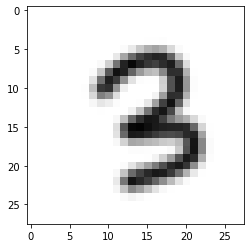

识别结果:
3


In [1]:



from PIL import Image, ImageFilter
import tensorflow as tf
import matplotlib.pyplot as plt

# def imageprepare(): 
#     im = Image.open('/root/code/3.png') #读取的图片所在路径，注意是28*28像素
#     plt.imshow(im)  #显示需要识别的图片
#     plt.show()
#     im = im.convert('L')
#     tv = list(im.getdata()) 
#     tva = [(255-x)*1.0/255.0 for x in tv] 
#     return tva

# result=imageprepare()
x = tf.placeholder(tf.float32, [None, 784])

y_ = tf.placeholder(tf.float32, [None, 10])

def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x,[-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

saver = tf.train.Saver()
sess = tf.Session()

sess.run(tf.global_variables_initializer())
saver.restore(sess, '/tmp/tf_csdn/model.ckpt') #使用模型，参数和之前的代码保持一致

prediction=tf.argmax(y_conv,1)
im = Image.open('/root/code/pic_png/3.png') #读取的图片所在路径，注意是28*28像素
plt.imshow(im)  #显示需要识别的图片
plt.show()
im = im.convert('L')
tv = list(im.getdata()) 
tva = [(255-x)*1.0/255.0 for x in tv] 
predint=prediction.eval(feed_dict={x: [tva],keep_prob: 1.0}, session=sess)

print('识别结果:')
print(predint[0])
#用了函数处理 图像数据 所以用x:【result】

In [ ]:



from PIL import Image, ImageFilter
import tensorflow as tf
import matplotlib.pyplot as plt

# def imageprepare(): 
#     im = Image.open('/root/code/3.jpg') #读取的图片所在路径，注意是28*28像素
#     plt.imshow(im)  #显示需要识别的图片
#     plt.show()
#     im = im.convert('L')
#     tv = list(im.getdata()) 
#     tva = [(255-x)*1.0/255.0 for x in tv] 
#     return tva

# result=imageprepare()
x = tf.placeholder(tf.float32, [None, 784])

y_ = tf.placeholder(tf.float32, [None, 10])

def weight_variable(shape):
    initial = tf.truncated_normal(shape,stddev = 0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1,shape = shape)
    return tf.Variable(initial)

def conv2d(x,W):
    return tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x,[-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image,W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

saver = tf.train.Saver()
sess = tf.Session()

sess.run(tf.global_variables_initializer())
saver.restore(sess, '/tmp/tf_csdn/model.ckpt') #使用模型，参数和之前的代码保持一致

im = Image.open('/root/code/3.png') #读取的图片所在路径，注意是28*28像素

plt.imshow(im)  #显示需要识别的图片
plt.show()
im = im.convert('L')
tv = list(im.getdata()) 
tva = [(255-x)*1.0/255.0 for x in tv] 

prediction=tf.argmax(y_conv,1)
predint=prediction.eval(feed_dict={x: [tva],keep_prob: 1.0}, session=sess)

print('识别结果:')
print(predint[0])
#正常处理 用tva变量赋值形式 图像数据 所以用x:【tva】

In [3]:
def prediction(sess,adds):
    from PIL import Image, ImageFilter
#     import tensorflow as tf
#     import matplotlib.pyplot as plt
    numbers = []
    for add in adds:
        im = Image.open(add) #读取的图片所在路径，注意是28*28像素
#         plt.imshow(im)  #显示需要识别的图片
#         plt.show()
        im = im.convert('L')
        tv = list(im.getdata()) 
        tva = [(255-x)*1.0/255.0 for x in tv] 
#         sess.run(tf.global_variables_initializer())
#         saver.restore(sess, '/tmp/tf_csdn/model.ckpt') #使用模型，参数和之前的代码保持一致
        prediction=tf.argmax(y_conv,1)
        predint=prediction.eval(feed_dict={x:[tva],keep_prob: 1.0},
                                session=sess)

        
        numbers.append(predint[0])
#     print(numbers)
    return numbers
  
adds = ["/root/code/pic_png/0.png","/root/code/pic_png/2.png","/root/code/pic_png/8.png"]
prediction(sess,adds)
#部署不进去 加引号的话  说 不在 说 x 不在 graph中

[0, 2, 8]

In [26]:
def prediction(sess,adds):
    from PIL import Image, ImageFilter
#     import tensorflow as tf
#     import matplotlib.pyplot as plt
    numbers = []
    for add in adds:
        im = Image.open(add) #读取的图片所在路径，注意是28*28像素
#         plt.imshow(im)  #显示需要识别的图片
#         plt.show()
        im = im.convert('L')
        tv = list(im.getdata()) 
        tva = [(255-x)*1.0/255.0 for x in tv] 
#         sess.run(tf.global_variables_initializer())
#         saver.restore(sess, '/tmp/tf_csdn/model.ckpt') #使用模型，参数和之前的代码保持一致
        prediction=tf.argmax(y_conv,1)
#         predint=prediction.eval(feed_dict={x:[tva],keep_prob: 1.0},
#                                 session=sess)
        predints=sess.run(prediction,feed_dict={x:[tva],keep_prob: 1.0})
        """
        tf.run()  tf.eval() 的区别
        在使用t.eval()等价于：tf.get_default_session().run(t)
        tf.run(t,feed_dict{}) ==> tf.eval(feed_dict{})

        """
        
        numbers.append(predint[0])
#     print(numbers)
    return numbers
  
# adds = ["/root/code/pic_png/0.png","/root/code/pic_png/2.png","/root/code/pic_png/8.png"]
adds = ["/root/code/pic_png/0.png"]
prediction(sess,adds)
#部署不进去 加引号的话  说 不在 说 x 不在 graph中
#不加 部署不进去

TypeError: Cannot interpret feed_dict key as Tensor: The name 'x' looks like an (invalid) Operation name, not a Tensor. Tensor names must be of the form "<op_name>:<output_index>".

In [19]:
sess

In [ ]:
def prediction1(sess, inputs):
    from PIL import Image, ImageFilter
    import tensorflow as tf
    import matplotlib.pyplot as plt
    numbers = []
#     global y_l
#     y_l = y_conv
    for add in adds:
        im = Image.open(add) #读取的图片所在路径，注意是28*28像素
        plt.imshow(im)  #显示需要识别的图片
        plt.show()
        im = im.convert('L')
        tv = list(im.getdata()) 
        tva = [(255-x)*1.0/255.0 for x in tv] 

#         prediction=tf.argmax(y_l,1)
        predint=prediction.eval(feed_dict={"x: [tva]","keep_prob: 1.0"},
                                session=sess)
        numbers.append(predint[0])
    print(numbers)
  
adds = ["/root/code/3.jpg","/root/code/0.jpg","/root/code/8.jpg"]
prediction(sess,adds)

In [ ]:
def predict3(sess, inputs):
    predint=prediction.eval(feed_dict={"x":inputs,keep_prob: 1.0},
                                session=sess)
    # `X` is used, it must be defined in the model with that name explicitly!
    return [str(p) for p in predint]
#部署 函数 一定要用sess.run 因为clipper只取到 sess ？？

In [ ]:
adds = ["/root/code/3.jpg","/root/code/0.jpg","/root/code/8.jpg"]
predict3(sess,adds)

In [2]:
def predict3(sess, adds):
    results=[]
    for add in adds:
        im = Image.open(add) #读取的图片所在路径，注意是28*28像素
#         plt.imshow(im)  #显示需要识别的图片
#         plt.show()
        im = im.convert('L')
        tv = list(im.getdata()) 
        tva = [(255-x)*1.0/255.0 for x in tv]
        predint=sess.run('predint:0',feed_dict={"x:[tva]":add})
        results.append(str(predint[0]))
    return results
#x的操作不在局部图中 
adds = ["/root/code/0.png","/root/code/2.png","/root/code/8.png"]
predict3(sess,adds)

FileNotFoundError: [Errno 2] No such file or directory: '/root/code/0.png'

In [ ]:
def predict3(sess, inputs):
    predint=sess.run('train_step',
                     feed_dict={"x":inputs, keep_prob: 0.5})
    # `X` is used, it must be defined in the model with that name explicitly!
    return [str(p) for p in predint]

In [ ]:
inputs= ["/root/code/pic_png/8.png"]
predict3(sess,inputs)

In [5]:
def predict2(sess, inputs):
    plc = inputs[0]
    preds = prediction.eval('prediction', 
                            feed_dict={'x:plc','keep_prob:1.0'},
                            session=sess) 
    # `X` is used, it must be defined in the model with that name explicitly!
    return [str(p) for p in preds]

In [ ]:
predict2(sess,["/root/code/8.jpg"])

In [6]:
from clipper_admin import ClipperConnection, DockerContainerManager
from clipper_admin.deployers.tensorflow import deploy_tensorflow_model
clipper_conn = ClipperConnection(DockerContainerManager())

In [7]:
clipper_conn.start_clipper()

20-04-08:03:20:34 INFO     [docker_container_manager.py:184] [default-cluster] Starting managed Redis instance in Docker
20-04-08:03:20:39 INFO     [docker_container_manager.py:276] [default-cluster] Metric Configuration Saved at /tmp/tmp4o6orfcx.yml
20-04-08:03:20:40 INFO     [clipper_admin.py:162] [default-cluster] Clipper is running


In [8]:
clipper_conn.connect()

20-04-08:03:20:59 INFO     [clipper_admin.py:172] [default-cluster] Successfully connected to Clipper cluster at localhost:1337


In [9]:
clipper_conn.register_application(
    name="mnist-app", input_type="strings", default_output="-1.0", slo_micros=100000)

20-04-08:03:21:04 INFO     [clipper_admin.py:236] [default-cluster] Application mnist-app was successfully registered


In [10]:
deploy_tensorflow_model(
    clipper_conn,
    name="mnist-mod",
    version=1, # version 2 of the same model, `predict` endpoint will be updated 
    # automatically to the newest model version
    input_type="strings",
    tf_sess_or_saved_model_path="/tmp/tf_csdn2/",
    func=predict6,
)

20-04-08:03:22:46 INFO     [deployer_utils.py:41] Saving function to /tmp/tmpxh57193iclipper
20-04-08:03:22:46 INFO     [deployer_utils.py:51] Serialized and supplied predict function
20-04-08:03:22:46 INFO     [tensorflow.py:264] TensorFlow model copied to: tfmodel 
20-04-08:03:22:46 INFO     [tensorflow.py:277] Using Python 3.6 base image
20-04-08:03:22:46 INFO     [clipper_admin.py:534] [default-cluster] Building model Docker image with model data from /tmp/tmpxh57193iclipper
20-04-08:03:22:47 INFO     [clipper_admin.py:539] [default-cluster] Step 1/2 : FROM clipper/tf36-container:0.4.1
20-04-08:03:22:47 INFO     [clipper_admin.py:539] [default-cluster]  ---> 3db42af800ff
20-04-08:03:22:47 INFO     [clipper_admin.py:539] [default-cluster] Step 2/2 : COPY /tmp/tmpxh57193iclipper /model/
20-04-08:03:22:47 INFO     [clipper_admin.py:539] [default-cluster]  ---> 37297391f966
20-04-08:03:22:47 INFO     [clipper_admin.py:539] [default-cluster] Successfully built 37297391f966
20-04-08:03:2

In [ ]:
clipper_conn.get_all_apps()

In [11]:
# Link the model and the app
clipper_conn.link_model_to_app(
    app_name="mnist-app",
    model_name="mnist-mod")

20-04-08:03:23:29 INFO     [clipper_admin.py:303] [default-cluster] Model mnist-mod is now linked to application mnist-app


In [12]:
# Get query address
query_address = clipper_conn.get_query_addr()

In [13]:
# Run a query
import requests, json, numpy as np
headers = {"Content-type": "application/json"}
requests.post("http://"+query_address+"/mnist-app/predict", headers=headers, data=json.dumps({
    "input": "/root/code/pic_png/0.png"})).json()

{'query_id': 0,
 'output': -1.0,
 'default': True,
 'default_explanation': 'No connected models found for query'}

In [ ]:
import base64
import json
import requests

In [ ]:

from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import json
import requests

def query_json(addr, filename, image_format):
    url = "http://%s/mnist-app/predict" % addr
    req_json = json.dumps({
        "input":
        json.dumps({
            'data':[(255-x)*1.0/255.0 for x in list(Image.open(filename).convert('L').getdata())], 
            'format': image_format
        })
    })
    headers = {'Content-type': 'application/json'}
    r = requests.post(url, headers=headers, data=req_json)
    print(r.json())
    
#数据处理还是不能成功预测 

In [ ]:
import base64
import json
import requests
def query_json(addr, filename, image_format):
    url = "http://%s/mnist-app/predict" % addr
    req_json = json.dumps({
        "input":
        json.dumps({
            'data': base64.b64encode(open(filename, "rb").read()).decode(),
            'format': image_format
        })
    })
    headers = {'Content-type': 'application/json'}
    r = requests.post(url, headers=headers, data=req_json)
    print(r.json())

In [ ]:
query_json(query_address, "/root/code/3.png", 'png')
# 数据处理在请求之前 依然收不到正常预测

In [15]:
clipper_conn.stop_all()

20-04-08:03:51:04 INFO     [clipper_admin.py:1424] [default-cluster] Stopped all Clipper cluster and all model containers
